In [27]:
import random
import matplotlib.image as mpimg
from keras.preprocessing import image

Using TensorFlow backend.


In [4]:
train = pd.read_csv("../asset/train.csv")

In [5]:
train.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [14]:
train.shape

(25361, 2)

In [15]:
len(train.Id.unique())

5005

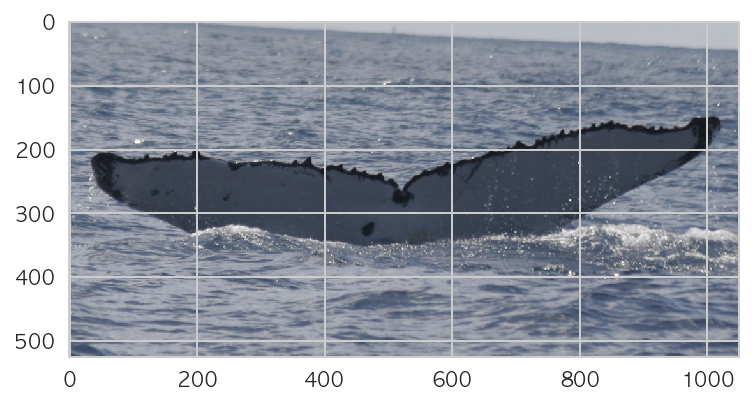

In [21]:
r = random.randint(0, len(train) - 1)
img = mpimg.imread("../asset/train/" + train.Image[r])
imgplot = plt.imshow(img)
plt.show()

In [28]:
def prepareImages(data, m, dataset):
    print("Preparing images")
    X_train = np.zeros((m, 100, 100, 3))
    count = 0
    
    for fig in data['Image']:
        #load images into images of size 100x100x3
        img = image.load_img("../input/"+dataset+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        X_train[count] = x
        if count % 500 == 0:
            print("Processing image: ", count + 1, ", ", fig)
        count += 1
    
    return X_train

In [ ]:
prepareImages()